#Load Data

In [21]:
!pip install pyreadstat
import pandas as pd
import numpy as np
import pyreadstat


In [22]:
GEM_data_df=pd.read_parquet('/content/GEM 2020 APS Global Individual Level Data_Jan2022.parquet')

In [23]:
#pd.set_option('display.max_columns', None)

#Overview of data

In [24]:
#Check the data
GEM_data_df.head()

,country,country_name,ctryalp,setid,id,region,wbinc,wbincrev,yrsurv,gender,...,su_cpgovres,bb_cpgovres,eb_cpgovres,teacpgovres,futsup_cp_sm,futsup_cp_hi,eea_stop,eea_newopp,eea_govres,eea_support
0,1.0,United States,US,1.200010e+11,1000172.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,United States,US,1.200010e+11,1000392.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,United States,US,1.200010e+11,1000453.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,4.0,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1.0,United States,US,1.200010e+11,1000502.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,United States,US,1.200010e+11,1000521.0,4.0,4.0,3.0,2020.0,1.0,...,NaN,4.0,NaN,4.0,1.0,0.0,NaN,NaN,NaN,NaN


In [25]:
#See the names of columns
GEM_data_df.columns


Index(['country', 'country_name', 'ctryalp', 'setid', 'id', 'region', 'wbinc',
       'wbincrev', 'yrsurv', 'gender',
       ...
       'su_cpgovres', 'bb_cpgovres', 'eb_cpgovres', 'teacpgovres',
       'futsup_cp_sm', 'futsup_cp_hi', 'eea_stop', 'eea_newopp', 'eea_govres',
       'eea_support'],
      dtype='object', length=469)

In [26]:
#To check the type of data by columns
GEM_data_df.dtypes

,0
country,float64
country_name,object
ctryalp,object
setid,float64
id,float64
...,...
futsup_cp_hi,float64
eea_stop,float64
eea_newopp,float64
eea_govres,float64


In [27]:
#Check the row labels
GEM_data_df.index

RangeIndex(start=0, stop=141403, step=1)

In [28]:
#Shows the number of rows and columns of the DataFrame. In this case 141403 represents the surveys and 470 the categories their answers fall into
GEM_data_df.shape


(141403, 469)

In [29]:
GEM_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141403 entries, 0 to 141402
Columns: 469 entries, country to eea_support
dtypes: float64(456), object(13)
memory usage: 506.0+ MB


#Cleaning data

In [30]:
#Checking the columns with null value
print(GEM_data_df.isnull().sum())
len(GEM_data_df)

country              0
country_name         0
ctryalp              0
setid                0
id                   0
                 ...  
futsup_cp_hi    108181
eea_stop        138968
eea_newopp      138981
eea_govres      139444
eea_support     139199
Length: 469, dtype: int64


141403

In [31]:
#Counting the number of non-null values in the DataFrame
GEM_data_df.notnull().sum()

,0
country,141403
country_name,141403
ctryalp,141403
setid,141403
id,141403
...,...
futsup_cp_hi,33222
eea_stop,2435
eea_newopp,2422
eea_govres,1959


I cannot use .dropna() because there is a lot of missing values, hence, there would not be enough data to work with

#Selecting and analysing data

I want to do a comparative analysis between 'Female' and 'Male' responses

In [32]:
#Classifying by name "Female" and "Male" the gente values 1 and 2
gender_map = {1: 'Male', 2: 'Female'}
GEM_data_df['gender'] = GEM_data_df['gender'].map(gender_map)

In [33]:
GEM_data_df.head()

,country,country_name,ctryalp,setid,id,region,wbinc,wbincrev,yrsurv,gender,...,su_cpgovres,bb_cpgovres,eb_cpgovres,teacpgovres,futsup_cp_sm,futsup_cp_hi,eea_stop,eea_newopp,eea_govres,eea_support
0,1.0,United States,US,1.200010e+11,1000172.0,4.0,4.0,3.0,2020.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,United States,US,1.200010e+11,1000392.0,4.0,4.0,3.0,2020.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,United States,US,1.200010e+11,1000453.0,4.0,4.0,3.0,2020.0,Female,...,NaN,4.0,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1.0,United States,US,1.200010e+11,1000502.0,4.0,4.0,3.0,2020.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,United States,US,1.200010e+11,1000521.0,4.0,4.0,3.0,2020.0,Male,...,NaN,4.0,NaN,4.0,1.0,0.0,NaN,NaN,NaN,NaN


In [34]:
# Calculating the top 3 countries with the most participation
country_counts = GEM_data_df['country_name'].value_counts().nlargest(3)
print( country_counts)

country_name
Spain     26075
Chile      9196
Poland     8000
Name: count, dtype: int64


In [35]:
#Here we can display the names of the countries with top 3 participation
country_counts.index


Index(['Spain', 'Chile', 'Poland'], dtype='object', name='country_name')

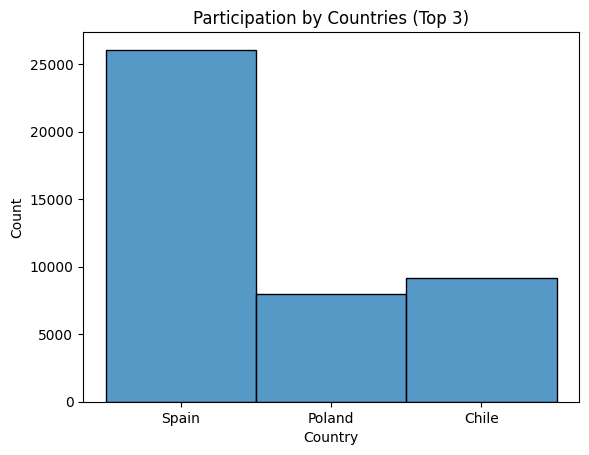

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter the DataFrame for the top countries
top_countries_df = GEM_data_df[GEM_data_df['country_name'].isin(country_counts.index)]

# Displaying of the histogram
ax = sns.histplot(top_countries_df['country_name'], discrete=True)
ax.set(title='Participation by Countries (Top 3)', xlabel='Country', ylabel='Count')
plt.show()

In [37]:
#Selecting the columns I will work
GEM_Cdata_df= GEM_data_df[['country_name','gender', 'age', 'uneduc', 'knowentr',	'opportl',	'suskilll',	'fearfaill', 'bstart']]

In [38]:
GEM_Cdata_df.head()

,country_name,gender,age,uneduc,knowentr,opportl,suskilll,fearfaill,bstart
0,United States,Female,44.0,7.0,1.0,4.0,2.0,4.0,0.0
1,United States,Female,40.0,6.0,2.0,4.0,1.0,5.0,0.0
2,United States,Female,64.0,6.0,2.0,1.0,5.0,5.0,1.0
3,United States,Female,42.0,6.0,0.0,1.0,5.0,5.0,0.0
4,United States,Male,37.0,6.0,1.0,5.0,5.0,4.0,1.0


In [39]:
GEM_Cdata_df.describe()

,age,uneduc,knowentr,opportl,suskilll,fearfaill,bstart
count,136324.000000,137870.000000,137814.000000,133679.000000,138767.000000,138050.000000,139456.000000
mean,41.300116,3.803714,1.000406,2.814990,3.266663,3.104411,0.148857
std,14.186192,1.878383,1.086761,1.445966,1.511145,1.541857,0.355949
min,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,3.000000,0.000000,1.000000,2.000000,2.000000,0.000000
50%,40.000000,3.000000,1.000000,3.000000,4.000000,3.000000,0.000000
75%,52.000000,6.000000,2.000000,4.000000,5.000000,5.000000,0.000000
max,96.000000,8.000000,3.000000,5.000000,5.000000,5.000000,1.000000


In [40]:
# Calculating measures of central tendency for Age
mean_age = GEM_Cdata_df['age'].mean()
median_age = GEM_Cdata_df['age'].median()
mode_age = GEM_Cdata_df['age'].mode()[0]

In [41]:
#Most surveyed people are close to their 40s
mean_age, median_age, mode_age

(41.30011590035504, 40.0, 40.0)

In [42]:
#Calculating the age range of respondents
range_age = GEM_Cdata_df['age'].max() - GEM_Cdata_df['age'].min()
print(f"The age range of respondents is {range_age} years.")

The age range of respondents is 78.0 years.


<ipython-input-43-47edf696d20b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(GEM_Cdata_df['age'], label='Age', shade=True).set_title('Distribution of Age')


Text(0.5, 1.0, 'Distribution of Age')

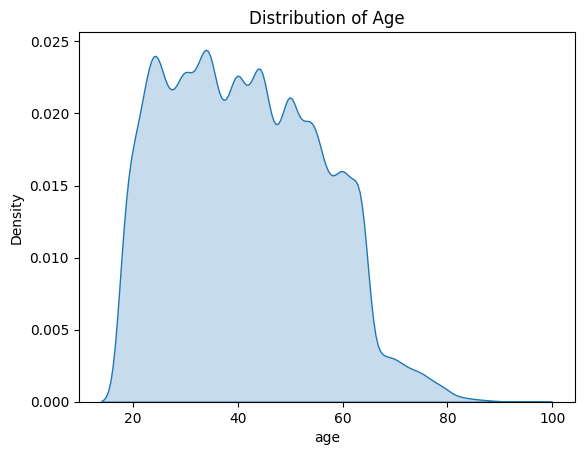

In [43]:
# Visualising the distribution of Age from respondants. The vast majority of participants belong to the young working class.
sns.kdeplot(GEM_Cdata_df['age'], label='Age', shade=True).set_title('Distribution of Age')

##Female vs Male

<ipython-input-44-c3a7eab41127>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='age', hue='gender', data=GEM_Cdata_df, label='Age', shade=True).set_title('Distribution of Age')


Text(0.5, 1.0, 'Distribution of Age')

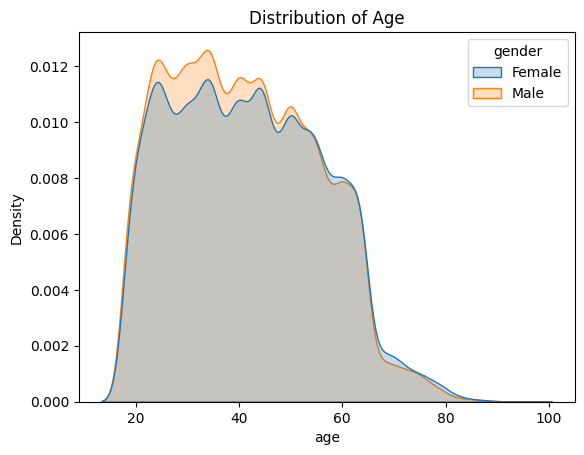

In [44]:
#Adding the hue parameter to visualise the distribution of age by gender
sns.kdeplot(x='age', hue='gender', data=GEM_Cdata_df, label='Age', shade=True).set_title('Distribution of Age')

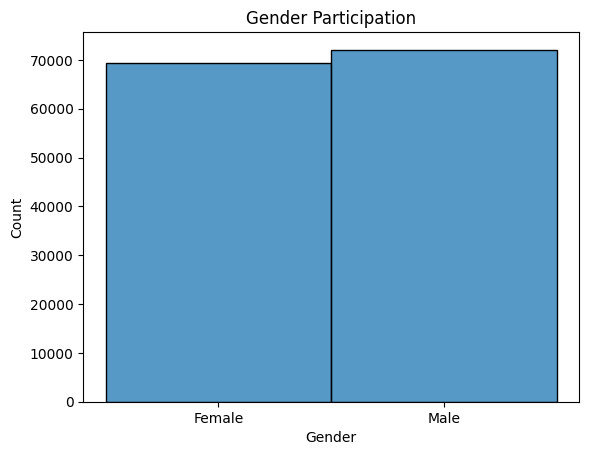

In [45]:
#This histogram represents the distribution of participation in the survey by gender
import matplotlib.pyplot as plt

sns.histplot(GEM_Cdata_df['gender'],discrete=True).set(title='Gender Participation', xlabel='Gender', ylabel='Count')
plt.xticks([0,1])
plt.show()

<Axes: xlabel='gender', ylabel='age'>

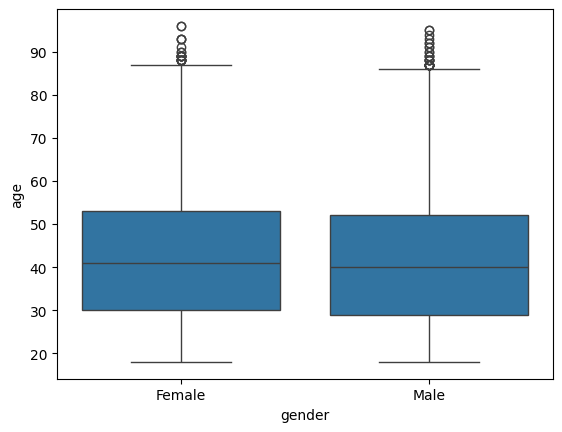

In [46]:
#It is clear that generally there is more participation from male respondants. Nevertheless, this BoxPlot shows us that also the female respondenst are more unevenly spread in regards of age when compared to the male
import seaborn as sns
sns.boxplot(data=GEM_Cdata_df, x='gender', y='age')

In [63]:
#We can compare directly the mean level of networking (people you know personally who have started a business or become self-employed), perceived opportunities for entrepreneurship, skills to start a new business, and whether the respondent has recently started a business.
GEM_Cdata_df.groupby(['country_name', 'gender'])[['knowentr',	'opportl',	'suskilll', 'bstart']].mean().nlargest(10, columns=['opportl'])

knowentr   opportl  suskilll    bstart
country_name gender                                        
Saudi Arabia Male    1.027718  4.259130  4.075586  0.210731
             Female  0.933918  4.133176  3.970554  0.208553
Togo         Female  1.684692  4.098492  4.529510  0.534269
Oman         Female  1.811905  4.066176  3.301653  0.374619
Togo         Male    1.673209  4.027864  4.510763  0.507782
Angola       Male    1.687565  3.948421  4.127310  0.654713
Oman         Male    1.831849  3.946411  3.444894  0.359204
India        Male    1.329890  3.785075  3.821344  0.186431
             Female  1.044866  3.783484  3.745728  0.108251
Angola       Female  1.559172  3.741573  4.191781  0.699219

The country with most perceived opportunities for entrepreneurship is Saudi Arabia, according to respondents.

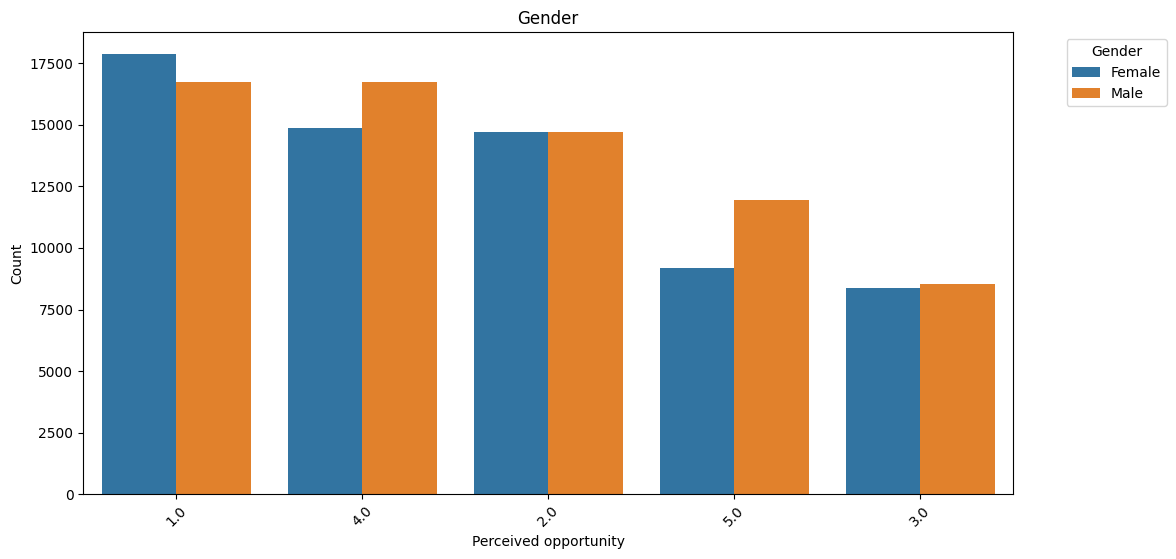

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Calculate the top 5 categories
top5_categories = GEM_Cdata_df['opportl'].value_counts().nlargest(5).index

sns.countplot(x='opportl', hue='gender', data=GEM_Cdata_df, order=top5_categories) # Use top5_categories instead of top3_categories

plt.title('Gender')
plt.xlabel('Perceived opportunity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Distribution of Fearfaill feeling by Gender')

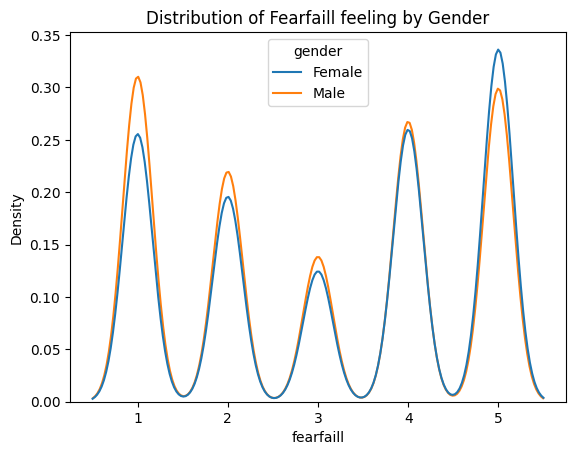

In [50]:
#It shows the fear of failure from starting a business by gender
sns.kdeplot(x='fearfaill', hue='gender', data=GEM_Cdata_df).set_title('Distribution of Fearfaill feeling by Gender')

Female respondents expressed a higher fear of failure for starting a new venture in comparison to the male counterparts.

Text(0.5, 1.0, 'Education level by Gender')

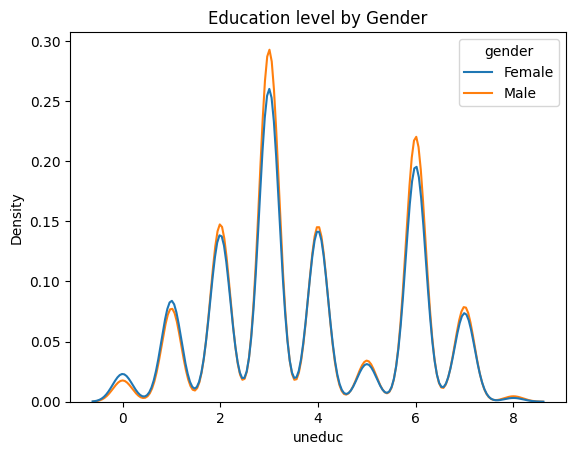

In [51]:
#This code help to visualise the level of education of the participants by gender
sns.kdeplot(x='uneduc', hue='gender', data=GEM_Cdata_df).set_title('Education level by Gender')

This graph pictures the more advanced educational level of the male respondants when compared to the female ones.  

###Another way of doing the same but with extra unnecessary steps

In [71]:
 #Displaying only Female answers
 GEM_Fdata_df= GEM_Cdata_df.loc[GEM_data_df['gender']=='Female']

Text(0.5, 1.0, 'Distribution of Uneduc in Female Respondants')

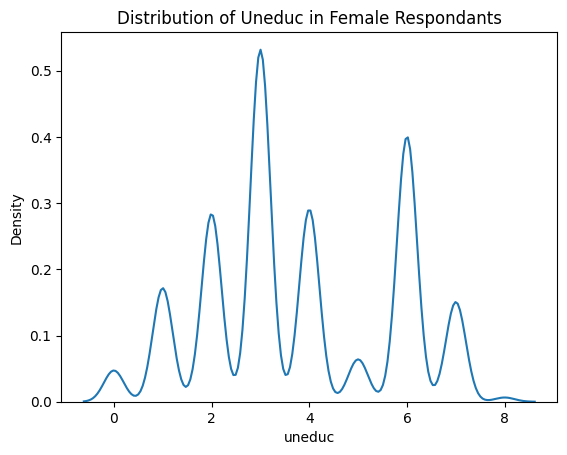

In [72]:
sns.kdeplot(x='uneduc', data=GEM_Fdata_df).set_title('Distribution of Uneduc in Female Respondants')

In [73]:
#Displaying only male answers
GEM_Mdata_df= GEM_Cdata_df.loc[GEM_data_df['gender']=='Male']

Text(0.5, 1.0, 'Distribution of Uneduc in Male Respondants')

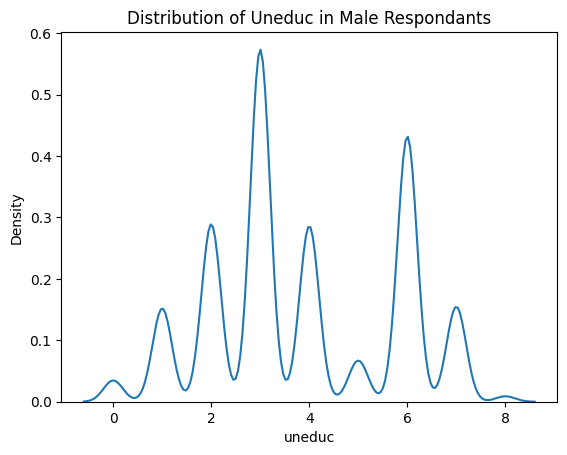

In [74]:
sns.kdeplot(x='uneduc', data=GEM_Mdata_df).set_title('Distribution of Uneduc in Male Respondants')

#Conclusions

More participation from male respondents

Spain is the country with the most data

There is an age gap of 78 years between the yougest and oldest respondent

Entrepreneurship environment remains male-dominant as most fields in business. Nvertheless, if compared to a decade ago these numbers represent a progress in the industry where more women are businessowners.

